# 6.6 Sourcing and Analyzing Time Series Data

1. Importing libraries and checking data 
2. Decomposing data
3. Conducting a Dickey-Fuller test to check for stationarity
4. Stationarizing dataframe
5. Checking autocorrelations


### 1. Importing libraries and checking data

In [81]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

In [82]:
quandl.ApiConfig.api_key = 'xDgUHcj-B7cHKpi2pUJK'

In [84]:
data = quandl.get('LBMA/GOLD')
# For the anaylis the whole data set will be considered. 

In [85]:
data.head(10)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
1968-01-09,35.14,NaN,14.576,NaN,NaN,NaN
1968-01-10,35.15,NaN,14.576,NaN,NaN,NaN
1968-01-11,35.17,NaN,14.596,NaN,NaN,NaN
1968-01-12,35.18,NaN,14.607,NaN,NaN,NaN


In [86]:
data.tail(10)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2023-03-24,1996.15,1993.80,1634.85,1631.13,1860.21,1855.03
2023-03-27,1960.25,1946.25,1599.17,1585.42,1821.66,1804.95
2023-03-28,1949.85,1962.85,1587.37,1595.21,1803.03,1813.87
2023-03-29,1965.85,1965.00,1593.91,1593.22,1812.91,1811.34
2023-03-30,1968.10,1965.80,1593.96,1588.17,1811.64,1800.08
2023-03-31,1978.80,1979.70,1599.46,1598.21,1816.93,1818.16
2023-04-03,1963.10,1983.30,1591.09,1598.94,1810.17,1820.47
2023-04-04,1982.25,2009.60,1585.60,1607.28,1814.16,1837.18
2023-04-05,2022.30,2030.85,1622.29,1625.90,1847.78,1853.15


In [87]:
data.shape

(13968, 6)

In [88]:
type(data)

pandas.core.frame.DataFrame

In [89]:
data.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

In [90]:
data2 = data.reset_index()

In [91]:
data2.head(10)

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1,1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
2,1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
3,1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
4,1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
5,1968-01-09,35.14,NaN,14.576,NaN,NaN,NaN
6,1968-01-10,35.15,NaN,14.576,NaN,NaN,NaN
7,1968-01-11,35.17,NaN,14.596,NaN,NaN,NaN
8,1968-01-12,35.18,NaN,14.607,NaN,NaN,NaN
9,1968-01-15,35.18,NaN,14.597,NaN,NaN,NaN


In [129]:
data_sub = data2.loc[(data2['Date'] >= '2000-01-01') & (data2['Date'] < '2022-12-31')]

In [130]:
data_sub.shape

(5811, 7)

In [131]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
datetime,,,,,,
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017
2000-01-10,281.70,281.60,172.230,171.959,275.205,274.812


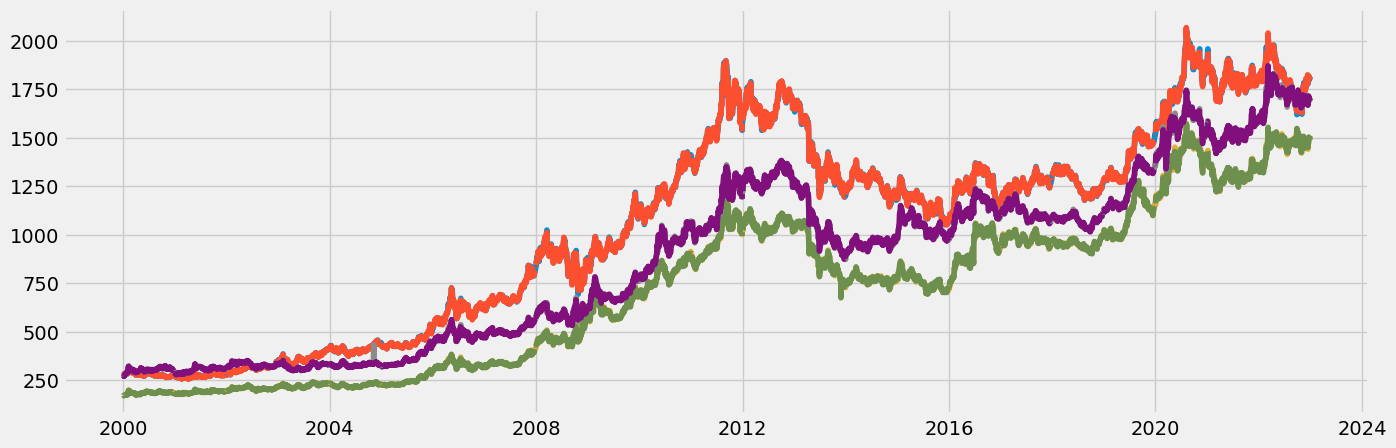

In [132]:
# Plotting data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [133]:
data_sub.dropna()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
datetime,,,,,,
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017
2000-01-10,281.70,281.60,172.230,171.959,275.205,274.812
...,...,...,...,...,...,...
2022-12-20,1806.35,1813.90,1486.630,1492.110,1698.510,1705.790
2022-12-21,1813.50,1817.55,1493.240,1502.390,1707.230,1713.770
2022-12-22,1815.20,1800.70,1501.350,1498.000,1705.380,1697.340


In [134]:
# Checking for missing values 
data_sub.isnull().sum()

USD (AM)      0
USD (PM)     46
GBP (AM)      0
GBP (PM)     46
EURO (AM)     0
EURO (PM)    46
dtype: int64

In [135]:
data_sub.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

In [136]:
df =data_sub[['USD (AM)']]

In [137]:
df.head(10)

,USD (AM)
datetime,
2000-01-04,282.05
2000-01-05,282.10
2000-01-06,280.35
2000-01-07,282.00
2000-01-10,281.70
2000-01-11,281.70
2000-01-12,282.25
2000-01-13,282.20
2000-01-14,284.15


### 2. Decomposing data

In [138]:
# Decomposition of the data
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period = 365)

In [139]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

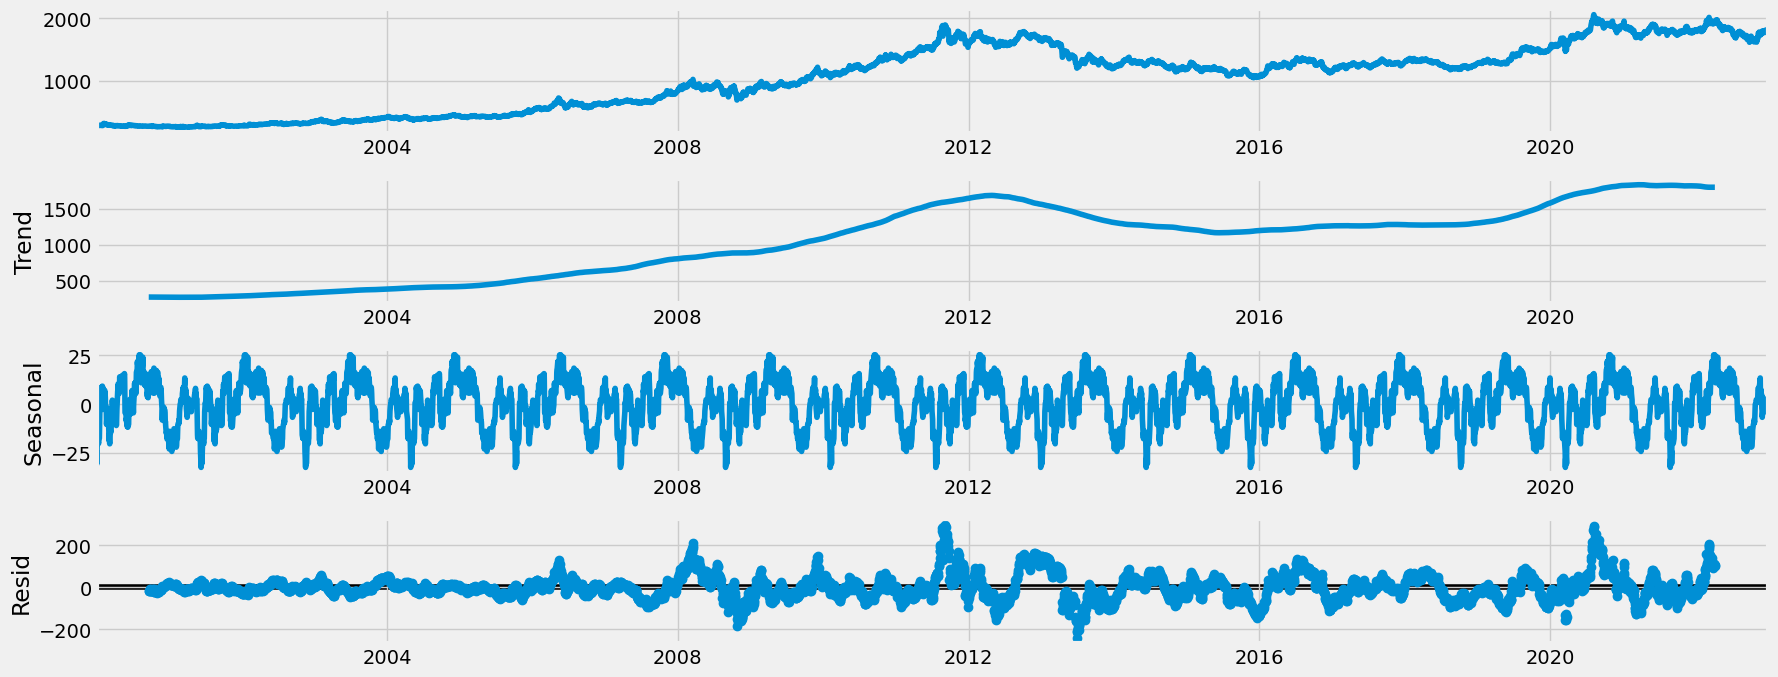

In [140]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Comments 
- The first graph called the level doesnt look like smooth as the trend, which means that the data itself has some noise. 
- In the seconf graph we can see the trend of the data under the timeframe define smoothed. 
- In yhe trend line we can see how the data is increasing until 2012 where it gets a max value and then decreases. 
- There is a seasonality presented in the data, there is a similar behaviour that we can see in the seasonal graph. 
- The last graph called resid referes to the noise, it can be seen in the graph and as commented earlier the data shows noise. 

### 3. Conducting a Dickey-Fuller test to check for stationarity

In [141]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['USD (AM)'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.741019
p-value                           0.835837
Number of Lags Used              31.000000
Number of Observations Used    5779.000000
Critical Value (1%)              -3.431482
Critical Value (5%)              -2.862040
Critical Value (10%)             -2.567036
dtype: float64


#### Comments 
- P - value is not significant in this case. The value is high. 
- In this case since critical value (5%) is smaller thatn the Test Statistics, we can conclude that the model is a non-stationary model. 

### 4. Stationarizing dataframe

In [142]:
data_diff = df - df.shift(1)

In [143]:
data_diff.dropna(inplace = True)

In [146]:
data_diff.head()

,USD (AM)
datetime,
2000-01-05,0.05
2000-01-06,-1.75
2000-01-07,1.65
2000-01-10,-0.30
2000-01-11,0.00


In [147]:
data_diff.columns

Index(['USD (AM)'], dtype='object')

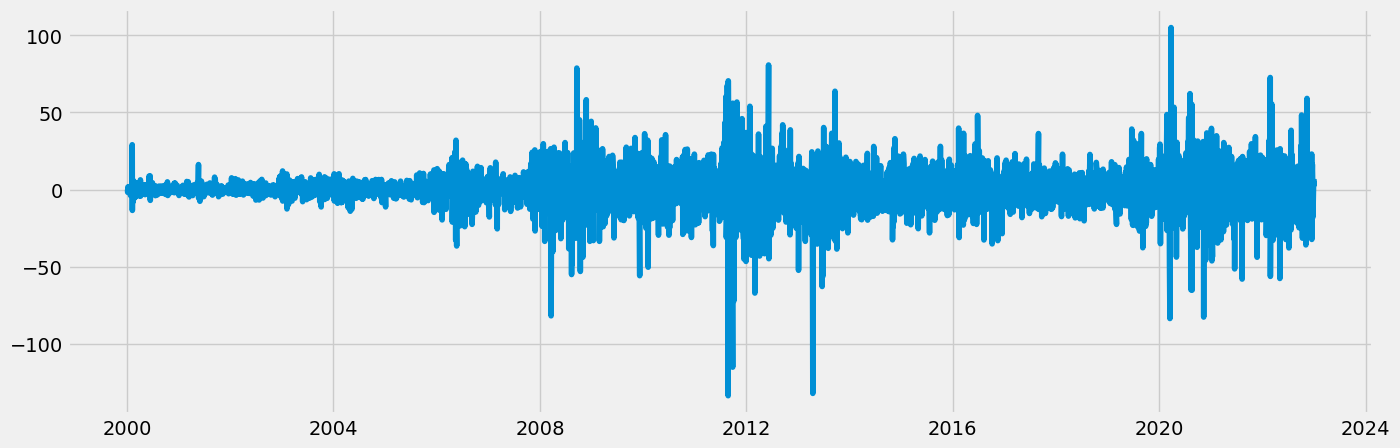

In [149]:
# Plot new data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [150]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.486159e+01
p-value                        1.715963e-27
Number of Lags Used            3.000000e+01
Number of Observations Used    5.779000e+03
Critical Value (1%)           -3.431482e+00
Critical Value (5%)           -2.862040e+00
Critical Value (10%)          -2.567036e+00
dtype: float64


#### Comments: 
- Test statistic is smaller thant the Critical Value, so there model is non-stationary. 

In [152]:
data_diff_2 = data_diff - data_diff.shift(1)

In [155]:
data_diff_2.dropna(inplace = True)

In [156]:
data_diff_2.head()

,USD (AM)
datetime,
2000-01-06,-1.80
2000-01-07,3.40
2000-01-10,-1.95
2000-01-11,0.30
2000-01-12,0.55


In [157]:
data_diff_2.columns

Index(['USD (AM)'], dtype='object')

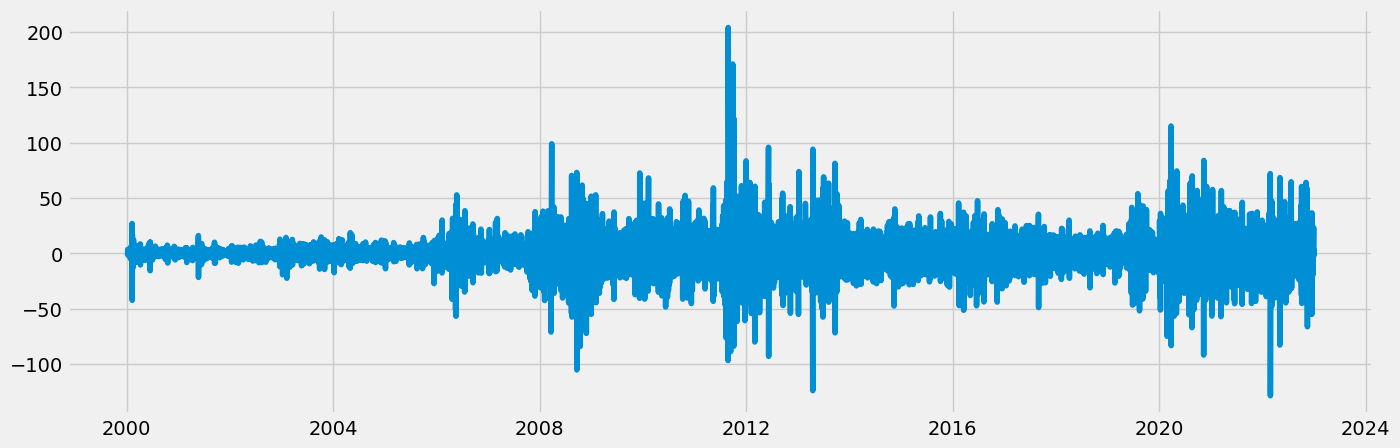

In [158]:
# Plot new data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [159]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -21.928064
p-value                           0.000000
Number of Lags Used              34.000000
Number of Observations Used    5774.000000
Critical Value (1%)              -3.431483
Critical Value (5%)              -2.862041
Critical Value (10%)             -2.567037
dtype: float64


#### Comments: 
The test statistic is smaller than Critcal Value (5%), the model is a non-stationary model. 

### 5. Checking autocorrelations

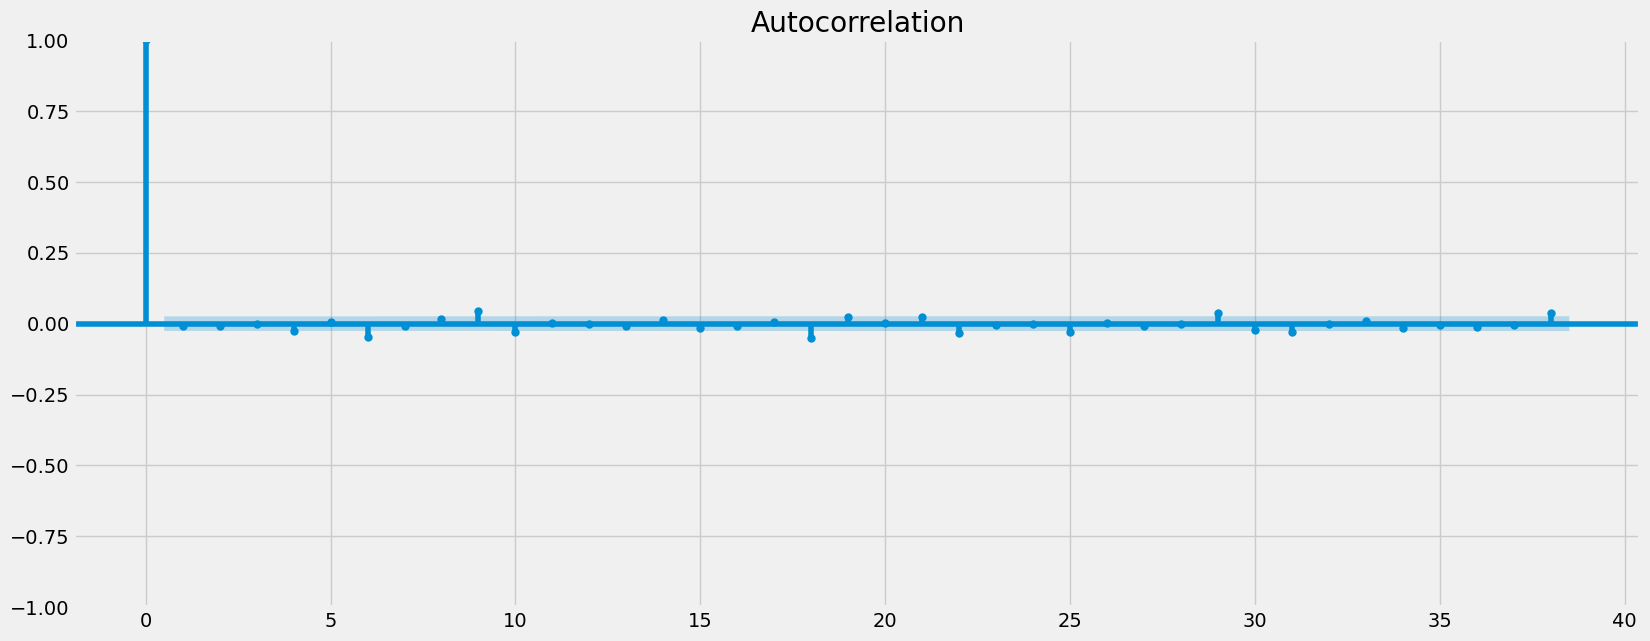

In [162]:
# Check autocorrelations 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()

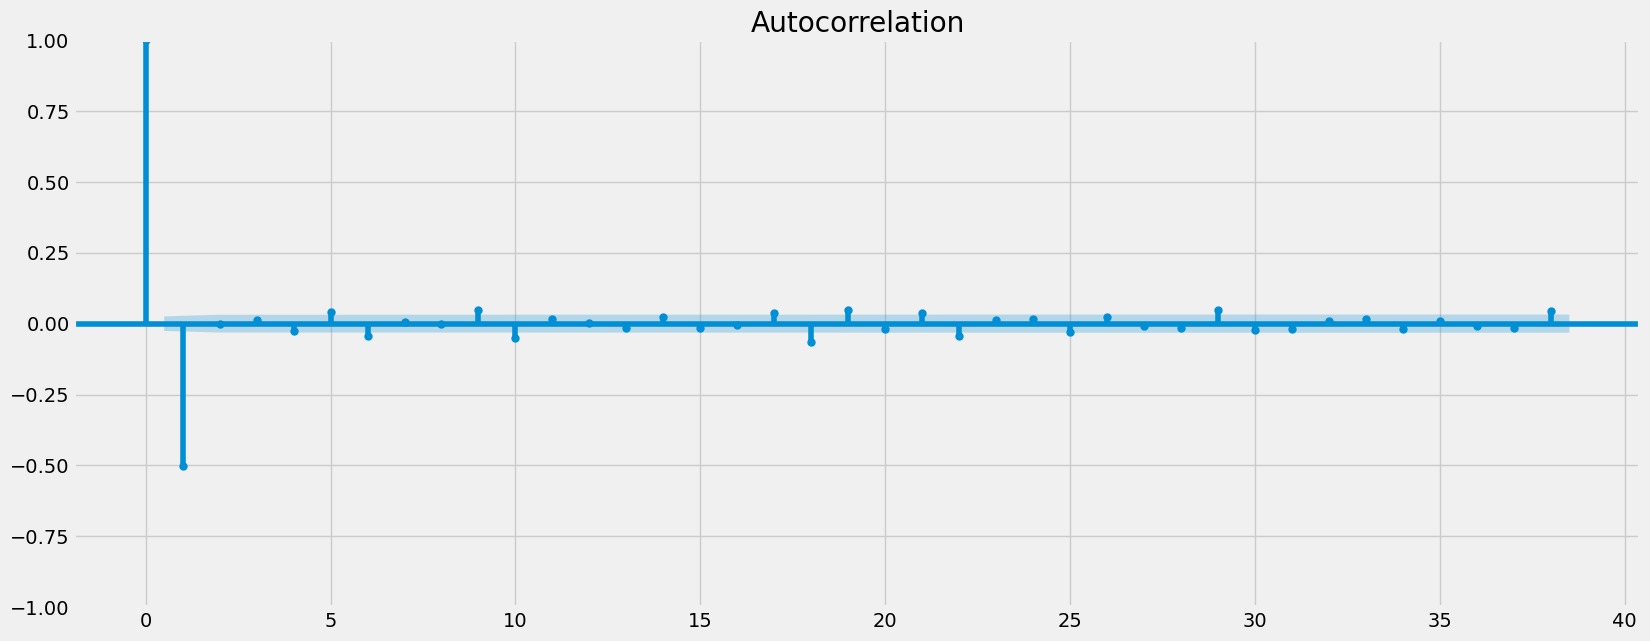

In [163]:
# Check autocorrelations

plot_acf(data_diff_2)
plt.show()

### Comments: 
- In general there correlation between the two variables is very low. There are diffrent point along the graph that let us see that the model is a non - stationary model. 